# Class documentation

In [1]:
try:
    from main_estimate import *
except:
    print('Error check packages dependencies / Kernel')

In [2]:
plt.style.use('classic')
import matplotlib.colors as mcolors

## (1) CPIframe

```python
# === Data (index = HICP & Qt without log transf.) ===
df_w = pd.read_excel("data/data_flat.xlsx",sheet_name="weights")
df_q_index = pd.read_excel("data/data_flat.xlsx",sheet_name="QT_index")
df_p_index = pd.read_excel("data/data_flat.xlsx",sheet_name="P_index")

class CPIframe:
    def __init__(self, df_q_index, df_p_index, df_w, country):
        """
        Args:
            df_q_index (DataFrame): The Quantity data (index).
            df_p_index (DataFrame): The Price data (index).
            df_w (DataFrame): The respective Weights data.
            country (str): Location available (EU27,France,Germany,Spain).
        """
````

In [3]:
meta_test = CPIframe(df_q_index=df_q_index, df_p_index=df_p_index, df_w=df_w, country="France")
print([atr for atr in dir(meta_test) if "__" not in atr])

['country', 'dates', 'end_flag', 'flag', 'flag_sector', 'flag_summary', 'framing', 'inflation', 'overall', 'price', 'price_index', 'qt', 'qt_index', 'sector', 'sector_inf', 'sectors', 'start_flag', 'weights']


- *flag_sectors*, *framing* and *sector* are methods for the class *CPIframe*
- *price_index* and *price* (data of *price_index* log-transformed) are subset dataframes of initial *df_p_index* (Price data) restricted to *country*
- *qt_index* and *qt* (data of *qt_index* log-transformed) are subset dataframes of initial *df_q_index* (Quantity data = demand proxy) restricted to *country*

In [4]:
meta_test.sectors   #COICOP 4-digit categories
#meta_test.inflation #MoM inflation rate dataframe
#meta_test.weights    #DataFrame of Annual sector weights in the overall HICP 
#meta_test.price
#meta_test.price_index
#meta_test.qt
#emeta_testu.qt_index

{0: 'Bread and cereals',
 1: 'Meat',
 2: 'Fish and seafood',
 3: 'Milk, cheese and eggs',
 4: 'Oils and fats',
 5: 'Fruit',
 6: 'Vegetables',
 7: 'Sugar, jam, honey, chocolate and confectionery',
 8: 'Food products n.e.c.',
 9: 'Coffee, tea and cocoa',
 10: 'Mineral waters, soft drinks, fruit and vegetable juices',
 11: 'Spirits',
 12: 'Wine',
 13: 'Beer',
 14: 'Tobacco',
 15: 'Clothing materials',
 16: 'Garments',
 17: 'Other articles of clothing and clothing accessories',
 18: 'Cleaning, repair and hire of clothing',
 19: 'Shoes and other footwear',
 20: 'Repair and hire of footwear',
 21: 'Actual rentals for housing',
 22: 'Maintenance and repair of the dwelling',
 23: 'Water supply and miscellaneous services relating to the dwelling',
 24: 'Electricity, gas and other fuels',
 25: 'Furniture and furnishings',
 26: 'Carpets and other floor coverings',
 27: 'Repair of furniture, furnishings and floor coverings',
 28: 'Household textiles',
 29: 'Major household appliances whether elect

In [5]:
meta_test.flag_summary()

0  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Bread and cereals
1  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Meat
2  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Fish and seafood
3  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Milk, cheese and eggs
4  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Oils and fats
5  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Fruit
6  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Vegetables
7  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Sugar, jam, honey, chocolate and confectionery
8  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Food products n.e.c.
9  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Coffee, tea and cocoa
10  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Mineral waters, soft drinks, fruit and vegetable juices
11  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Spirits
12  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Wine
13  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Beer
14  : OK  2000 - 2 ; 2023 - 9  --  284  obs. --  Tobacco
15  : end 

## (2) sector_estimation

Builds on a `CPIframe`object.

```python
class sector_estimation:
    def __init__(self,
                 meta:CPIframe,
                 col:int,
                 order:Union[int, str]="auto",maxlag=24,trend="n",
                 shapiro:bool=True,
                 shapiro_robust:bool=False,
                 sheremirov:bool=True,
                 sheremirov_window:list=[1,11]):
        """
        Args:
            - `meta`: `CPIframe` object
            - `col`: sector column number in [0,93]
            - If too litte data for sector 'col' then raises ValueError
            - VAR model is built with first diff then demeand log-transformed data
            - `classify_inflation`: if False only returns Shapiro and Sheremirov classification in binary form 
                Otherwise returns [classified weighted inflation rate] : 1(dem)*weight*inf_rate & 1(sup)*w*inf_rate 
                
            `VAR parametrization`
            order: if "auto" VAR order is automatically selected. Else requires an integer
            maxlag: higher bound of order selection
            trend: should remain "n" because data have been demeaned and are supposed to be stationary (no trend)
            
            `Labeling methods`
            shapiro: if True computes baseline Shapiro(2022) labeling method with reduced-form estimated VAR
            shapiro_robustness: if True also computes alternative labeling methodologies
            sheremirov: if True computes baseline Sheremirov(2022) labeling method
            sheremirov_window: [Transitory,Persistent] parametrization of step classification algo step5
        """

**ex: For a given sector in column col=64**

#### 1/ Automatic lag order selection

In [6]:
# When order is automatically selected results accessible via aic and bic are accessed via (...).aic or (...).bic
test_sect_estim1 = sector_estimation(meta=meta_test, col=12, shapiro_robust=True)
test_sect_estim12 = sector_estimation(meta=meta_test, col=12, shapiro_robust=True, classify_inflation=False)
test_sect_estim1.sec_name

'Wine'

In [7]:
#test_sect_estim1.aic.summary() #Estimated model with AIC
#test_sect_estim1.aic.shapiro #Shapiro classification (without alternative methods)
print('> Shapiro classification')
print('Baseline:dem-sup \nSmoothed classification:dem-sup_j1 to dem-sup_j3 \nParametric classification:dem-sup_param')
#display(test_sect_estim1.aic.shapiro_robust)
display(test_sect_estim1.aic.shapiro_robust.dropna())
print('> Sheremirov classification')
#display(test_sect_estim1.sheremirov)
display(test_sect_estim1.sheremirov.dropna())

> Shapiro classification
Baseline:dem-sup 
Smoothed classification:dem-sup_j1 to dem-sup_j3 
Parametric classification:dem-sup_param


,dem,sup,dem_j1,sup_j1,dem_j2,sup_j2,dem_j3,sup_j3,dem_param,sup_param
2001-06-01,-0.000297,-0.000000,-0.000000,-0.000297,-0.000000,-0.000297,-0.000000,-0.000297,-0.000160,-0.000138
2001-07-01,0.001785,0.000000,0.000000,0.001785,0.000000,0.001785,0.000000,0.001785,0.000909,0.000876
2001-08-01,0.000000,0.001783,0.001783,0.000000,0.000000,0.001783,0.000000,0.001783,0.000611,0.001171
2001-09-01,0.000742,0.000000,0.000742,0.000000,0.000742,0.000000,0.000742,0.000000,0.000695,0.000047
2001-10-01,-0.001334,-0.000000,-0.001334,-0.000000,-0.001334,-0.000000,-0.001334,-0.000000,-0.001159,-0.000175
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.005267,0.000000,0.000000,0.005267,0.005267,0.000000,0.005267,0.000000,0.002974,0.002293
2023-06-01,0.005034,0.000000,0.005034,0.000000,0.005034,0.000000,0.005034,0.000000,0.004318,0.000716
2023-07-01,0.000000,0.000658,0.000000,0.000658,0.000000,0.000658,0.000000,0.000658,0.000006,0.000652
2023-08-01,0.000000,0.003749,0.000000,0.003749,0.000000,0.003749,0.000000,0.003749,0.001305,0.002443


> Sheremirov classification


,dem,sup,dem_pers,dem_trans,sup_pers,sup_trans
2001-01-01,0.0,0.003899,0.0,0.0,0.0,0.000000
2001-02-01,0.0,0.002242,0.0,0.0,0.0,0.000000
2001-03-01,0.0,0.002238,0.0,0.0,0.0,0.000000
2001-04-01,0.0,0.001340,0.0,0.0,0.0,0.000000
2001-05-01,-0.0,-0.000297,-0.0,-0.0,-0.0,-0.000000
...,...,...,...,...,...,...
2023-05-01,0.0,0.005267,0.0,0.0,0.0,0.005267
2023-06-01,0.0,0.005034,0.0,0.0,0.0,0.005034
2023-07-01,0.0,0.000658,0.0,0.0,0.0,0.000658
2023-08-01,0.0,0.003749,0.0,0.0,0.0,0.003749


In [8]:
test_sect_estim1.aic.shapiro

,dem,sup,dem+,dem-,sup+,sup-
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-05-01,0.005267,0.000000,0.000000,0.005267,0.000000,0.0
2023-06-01,0.005034,0.000000,0.005034,0.000000,0.000000,0.0
2023-07-01,0.000000,0.000658,0.000000,0.000000,0.000658,0.0
2023-08-01,0.000000,0.003749,0.000000,0.000000,0.003749,0.0


In [9]:
print('> Shapiro classification classify_inflation=False')
print('Baseline:dem-sup \nSmoothed classification:dem-sup_j1 to dem-sup_j3 \nParametric classification:dem-sup_param')
#display(test_sect_estim12.aic.shapiro_robust)
display(test_sect_estim12.aic.shapiro_robust.dropna())
print('> Sheremirov classification classify_inflation=False')
#display(test_sect_estim12.sheremirov)
display(test_sect_estim12.sheremirov.dropna())

> Shapiro classification classify_inflation=False
Baseline:dem-sup 
Smoothed classification:dem-sup_j1 to dem-sup_j3 
Parametric classification:dem-sup_param


,dem,sup,dem_j1,sup_j1,dem_j2,sup_j2,dem_j3,sup_j3,dem_param,sup_param
2001-06-01,1,0,0,1,0,1,0,1,0.537329,0.462671
2001-07-01,1,0,0,1,0,1,0,1,0.509401,0.490599
2001-08-01,0,1,1,0,0,1,0,1,0.342880,0.657120
2001-09-01,1,0,1,0,1,0,1,0,0.936729,0.063271
2001-10-01,1,0,1,0,1,0,1,0,0.868970,0.131030
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,1,0,0,1,1,0,1,0,0.564709,0.435291
2023-06-01,1,0,1,0,1,0,1,0,0.857753,0.142247
2023-07-01,0,1,0,1,0,1,0,1,0.009548,0.990452
2023-08-01,0,1,0,1,0,1,0,1,0.348230,0.651770


> Sheremirov classification classify_inflation=False


,dem,sup,dem_pers,dem_trans,sup_pers,sup_trans
2001-01-01,0,1,0,0,0,0
2001-02-01,0,1,0,0,0,0
2001-03-01,0,1,0,0,0,0
2001-04-01,0,1,0,0,0,0
2001-05-01,0,1,0,0,0,0
...,...,...,...,...,...,...
2023-05-01,0,1,0,0,0,1
2023-06-01,0,1,0,0,0,1
2023-07-01,0,1,0,0,0,1
2023-08-01,0,1,0,0,0,1


In [10]:
test_sect_estim1.inflation
# inflation (infw) is MoM%HICP * weight in overall HICP

,infw
2000-01-01,NaN
2000-02-01,0.003774
2000-03-01,0.003292
2000-04-01,-0.001876
2000-05-01,0.002192
...,...
2023-05-01,0.005267
2023-06-01,0.005034
2023-07-01,0.000658
2023-08-01,0.003749


#### 2/ Fixed order

In [11]:
# When order is hand-fixed results are accessible via (...).estimate
test_sect_estim2 = sector_estimation(meta=meta_test, col=12, order=12, shapiro_robust=True)
test_sect_estim22 = sector_estimation(meta=meta_test, col=12, order=12, shapiro_robust=True, classify_inflation=False)

In [12]:
#test_sect_estim2.estimate.summary() #Estimated model with selected order
#test_sect_estim2.estimate.shapiro #(without alternative methods)
print('> Shapiro classification')
display(test_sect_estim2.estimate.shapiro_robust)
print('> Sheremirov classification')
display(test_sect_estim2.sheremirov)

> Shapiro classification


,dem,sup,dem_j1,sup_j1,dem_j2,sup_j2,dem_j3,sup_j3,dem_param,sup_param
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-01,0.005267,0.000000,0.005267,0.000000,0.000000,0.005267,0.005267,0.000000,0.002974,0.002293
2023-06-01,0.005034,0.000000,0.005034,0.000000,0.005034,0.000000,0.005034,0.000000,0.003899,0.001135
2023-07-01,0.000000,0.000658,0.000000,0.000658,0.000000,0.000658,0.000000,0.000658,0.000005,0.000653
2023-08-01,0.000000,0.003749,0.000000,0.003749,0.000000,0.003749,0.000000,0.003749,0.000913,0.002835


> Sheremirov classification


,dem,sup,dem_pers,dem_trans,sup_pers,sup_trans
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-05-01,0.0,0.005267,0.0,0.0,0.0,0.005267
2023-06-01,0.0,0.005034,0.0,0.0,0.0,0.005034
2023-07-01,0.0,0.000658,0.0,0.0,0.0,0.000658
2023-08-01,0.0,0.003749,0.0,0.0,0.0,0.003749


## (3) CPIlabel

Builds on a `CPIframe`object.

Iterates over all sectors.

```python
class CPIlabel:
    def __init__(self,meta:CPIframe,
                 order:Union[int, str]="auto",maxlag=24,
                 shapiro_robust:bool=False,
                 sheremirov_window:list[int,int]=[1,11],
                 annual_rate:bool=True):
        """
        Args:
            - `meta`: `CPIframe` object
            - `order`: if "auto" VAR order is automatically selected. Else requires an integer
            - `maxlag`: higher bound of order selection (if order="auto")
            - `shap_robust`: if True also computes alternative labeling methodologies
            - `sheremirov_window: [Transitory,Persistent] parametrization of step classification algo step5 
            - `annual_rate`: output dataframes are YoY rates, otherwise MoM
            -  NB1: VAR models are built with first diff then demeand log-transformed data

        Attributes:        
        self.demand_corr_v : cross-correlations b/w different methods for demand-driven contribution
        self.supply_corr_v : same for supply
        
        #Shapiro classification
        > if self.order is "auto"
            - shapiro_aic : overall CPI classified (demand/supply & sign)
            - shapiro_aic_sec : dataframe with all sectors classifications
            - shapiro_bic : same with BIC criterion selected model
            - shapiro_bic_sec : ---
            > if shap_robust is True
                - shapiro_aic_r : shapiro_aic but includes alternative methodologies
                - shapiro_aic_sec_r : shapiro_aic_r but includes alternative methodologies
                - shapiro_bic_r : same with BIC criterion selected model
                - shapiro_bic_r_share : ---
        > self.order is an integer
        Same objects but only one VAR of specified order was estimated for each sector (if not flagged), so no AIC/BIC
            - shapiro
            - shapiro_sec 
            > if shap_robust is True:
                - shapiro_r 
                - shapiro_sec_r
                
        #Sheremirov classification
        - sheremirov : overall CPI classified (demand/supply & sign)
        - sheremirov_sec : ---

        Methods:
        # .correlation(comp="supply" or "demand") for heatmap
        # .stack_plot(df,unclassified:bool=True,year:int=2015)
            - df : should be one of self. shapiro_aic/shapiro_bic/shapiro/sheremirov
            - unclassified : show unclassified inflation or not
            - year : starting year on plot
        """
````

In [13]:
# Example with sector-specific VAR order automatically selected 
cpi_meta = CPIlabel(meta=meta_test)

>> CPI decomposition for France processing


100%|#################################################################################################################| 94/94 [00:04<00:00, 20.52it/s]


In [14]:
cpi_meta.shapiro_aic_sec

Sector            0                                                      1   \
Component        dem      dem+      dem-       sup      sup+ sup-       dem   
2000-04-01       NaN       NaN       NaN       NaN       NaN  NaN       NaN   
2000-05-01  0.005716  0.005716  0.000000  0.000000  0.000000  0.0       NaN   
2000-06-01  0.001501  0.000000  0.001501  0.000000  0.000000  0.0       NaN   
2000-07-01  0.000000  0.000000  0.000000  0.003899  0.003899  0.0       NaN   
2000-08-01  0.000000  0.000000  0.000000  0.001198  0.001198  0.0       NaN   
...              ...       ...       ...       ...       ...  ...       ...   
2023-05-01  0.016412  0.000000  0.016412  0.000000  0.000000  0.0  0.016497   
2023-06-01  0.000000  0.000000  0.000000  0.007333  0.007333  0.0  0.006356   
2023-07-01  0.000000  0.000000  0.000000  0.005663  0.005663  0.0  0.011631   
2023-08-01  0.000000  0.000000  0.000000  0.008479  0.008479  0.0  0.000000   
2023-09-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.0 -0.007366   

Sector                                    ...   91                      \
Component       dem+      dem-       sup  ... dem-       sup      sup+   
2000-04-01       NaN       NaN       NaN  ...  NaN       NaN       NaN   
2000-05-01       NaN       NaN       NaN  ...  NaN       NaN       NaN   
2000-06-01       NaN       NaN       NaN  ...  NaN       NaN       NaN   
2000-07-01       NaN       NaN       NaN  ...  NaN       NaN       NaN   
2000-08-01       NaN       NaN       NaN  ...  NaN       NaN       NaN   
...              ...       ...       ...  ...  ...       ...       ...   
2023-05-01  0.000000  0.016497  0.000000  ...  0.0  0.000000  0.000000   
2023-06-01  0.006356  0.000000  0.000000  ... -0.0 -0.002124 -0.002124   
2023-07-01  0.011631  0.000000  0.000000  ... -0.0 -0.009341 -0.009341   
2023-08-01  0.000000  0.000000  0.005006  ...  0.0  0.010140  0.000000   
2023-09-01 -0.007366 -0.000000 -0.000000  ...  NaN       NaN       NaN   

Sector                92                                     
Component      sup-  dem dem+ dem-       sup sup+      sup-  
2000-04-01      NaN  NaN  NaN  NaN       NaN  NaN       NaN  
2000-05-01      NaN  NaN  NaN  NaN       NaN  NaN       NaN  
2000-06-01      NaN  NaN  NaN  NaN       NaN  NaN       NaN  
2000-07-01      NaN  NaN  NaN  NaN       NaN  NaN       NaN  
2000-08-01      NaN  NaN  NaN  NaN       NaN  NaN       NaN  
...             ...  ...  ...  ...       ...  ...       ...  
2023-05-01  0.00000  0.0  0.0  0.0  0.000951  0.0  0.000951  
2023-06-01 -0.00000  0.0  0.0  0.0  0.001750  0.0  0.001750  
2023-07-01 -0.00000 -0.0 -0.0 -0.0 -0.011012 -0.0 -0.011012  
2023-08-01  0.01014  0.0  0.0  0.0  0.008647  0.0  0.008647  
2023-09-01      NaN  NaN  NaN  NaN       NaN  NaN       NaN  

[282 rows x 384 columns]

In [15]:
cpi_meta.shapiro_aic

,dem,dem+,dem-,sup,sup+,sup-,unclassified
2003-01-01,0.776710,0.927022,-0.150312,0.632795,-0.919344,1.552139,0.442595
2003-02-01,0.950730,1.129891,-0.179162,0.887030,-0.818519,1.705549,0.696527
2003-03-01,0.956775,1.177412,-0.220637,0.962875,-0.807031,1.769906,0.591656
2003-04-01,1.075186,1.223045,-0.147859,0.361325,-1.189668,1.550994,0.509469
2003-05-01,0.746080,1.113992,-0.367912,0.468895,-1.199709,1.668605,0.534974
...,...,...,...,...,...,...,...
2023-04-01,2.445955,2.634496,-0.188541,3.608411,-1.099066,4.707477,0.640753
2023-05-01,2.034535,2.387355,-0.352820,3.204229,-1.185513,4.389743,0.628017
2023-06-01,1.841321,2.237373,-0.396052,2.665721,-1.110709,3.776430,0.713629
2023-07-01,1.762429,1.952871,-0.190442,2.516776,-0.794994,3.311770,0.694487


In [16]:
cpi_meta.shapiro_aic_r

,dem,dem_j1,dem_j2,dem_j3,dem_param,sup,sup_j1,sup_j2,sup_j3,sup_param,unclassified
2003-04-01,1.075186,1.316321,1.021412,0.776881,0.856956,0.361325,0.120190,0.415099,0.659630,0.579555,0.509469
2003-05-01,0.746080,1.184461,0.847610,0.669504,0.678745,0.468895,0.030515,0.367366,0.545472,0.536230,0.534974
2003-06-01,0.725442,0.964692,0.761788,0.701039,0.684408,0.705233,0.465983,0.668887,0.729636,0.746267,0.562053
2003-07-01,0.601459,1.041081,0.788722,0.842741,0.628192,0.894412,0.454790,0.707149,0.653130,0.867679,0.462334
2003-08-01,0.524061,1.044961,0.742067,0.855377,0.630550,0.987525,0.466624,0.769519,0.656209,0.881035,0.478591
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,2.445955,1.883991,2.445589,2.748257,2.280937,3.608411,4.170375,3.608777,3.306109,3.773429,0.640753
2023-05-01,2.034535,1.379686,1.807616,2.092927,1.890125,3.204229,3.859078,3.431148,3.145837,3.348639,0.628017
2023-06-01,1.841321,1.165692,1.266443,1.813726,1.689281,2.665721,3.341350,3.240599,2.693316,2.817761,0.713629
2023-07-01,1.762429,0.724558,0.813409,1.346435,1.710010,2.516776,3.554648,3.465797,2.932771,2.569195,0.694487


Text(0.5, 1.0, 'AIC vs BIC select model comparison : estimated supply component of YoY% inflation')

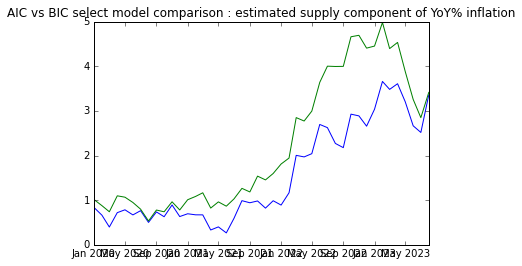

In [17]:
matplotlib.rcParams['figure.figsize'] = [14, 7]
plt.plot(cpi_meta.shapiro_aic_r[(cpi_meta.shapiro_aic_r.index.year>=2020)]['sup'])
plt.plot(cpi_meta.shapiro_bic_r[(cpi_meta.shapiro_bic_r.index.year>=2020)]['sup'])
plt.title('AIC vs BIC select model comparison : estimated supply component of YoY% inflation')

Text(0.5, 1.0, 'Classification: alternative methodologies with AIC-selected model')

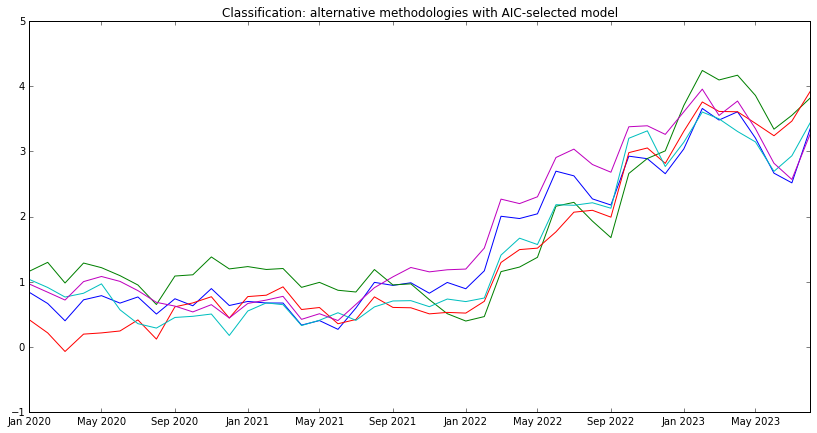

In [18]:
matplotlib.rcParams['figure.figsize'] = [14, 7]
plt.plot(cpi_meta.shapiro_aic_r[(cpi_meta.shapiro_aic_r.index.year>=2020)][['sup','sup_j1','sup_j2','sup_j3','sup_param']])
plt.title('Classification: alternative methodologies with AIC-selected model')

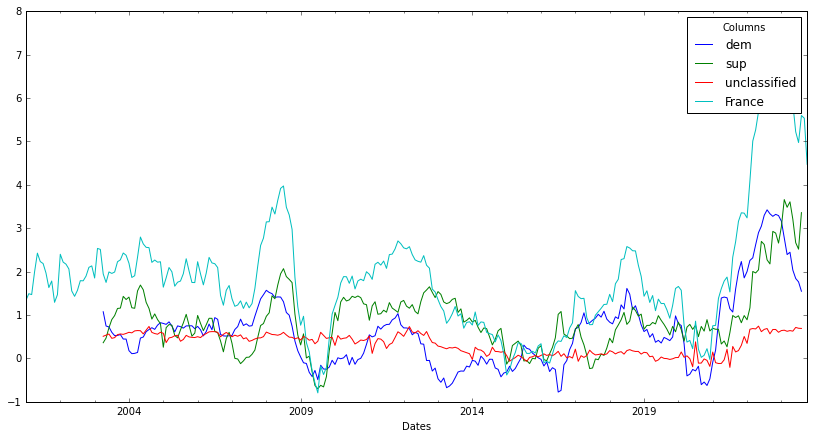

In [19]:
matplotlib.rcParams['figure.figsize'] = [14, 7]
ax = cpi_meta.shapiro_aic_r[["dem","sup","unclassified"]].plot()
cpi_meta.meta.overall.rolling(12).sum().dropna()[[cpi_meta.meta.country]].plot(ax=ax) #YoY overall inflation
plt.legend(title='Columns')
plt.show()

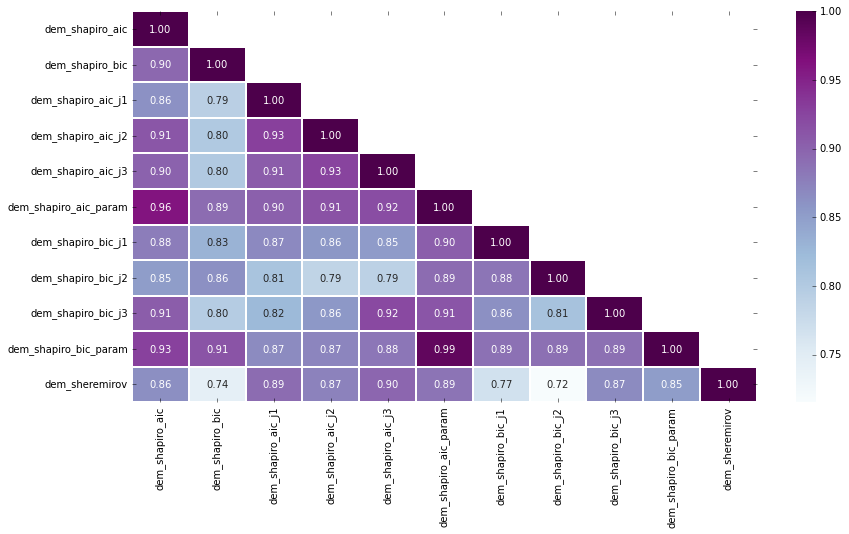

In [20]:
matplotlib.rcParams['figure.figsize'] = [14, 7]
cpi_meta.correlation("demand")

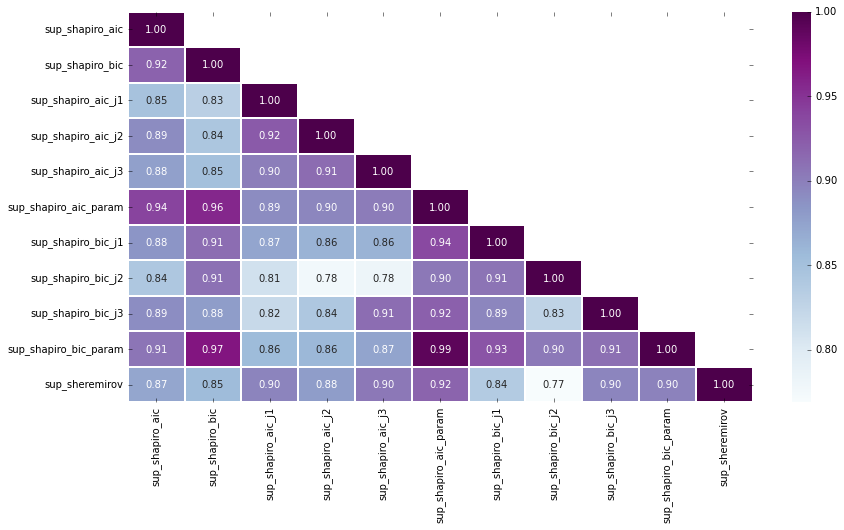

In [21]:
matplotlib.rcParams['figure.figsize'] = [14, 7]
cpi_meta.correlation("supply")

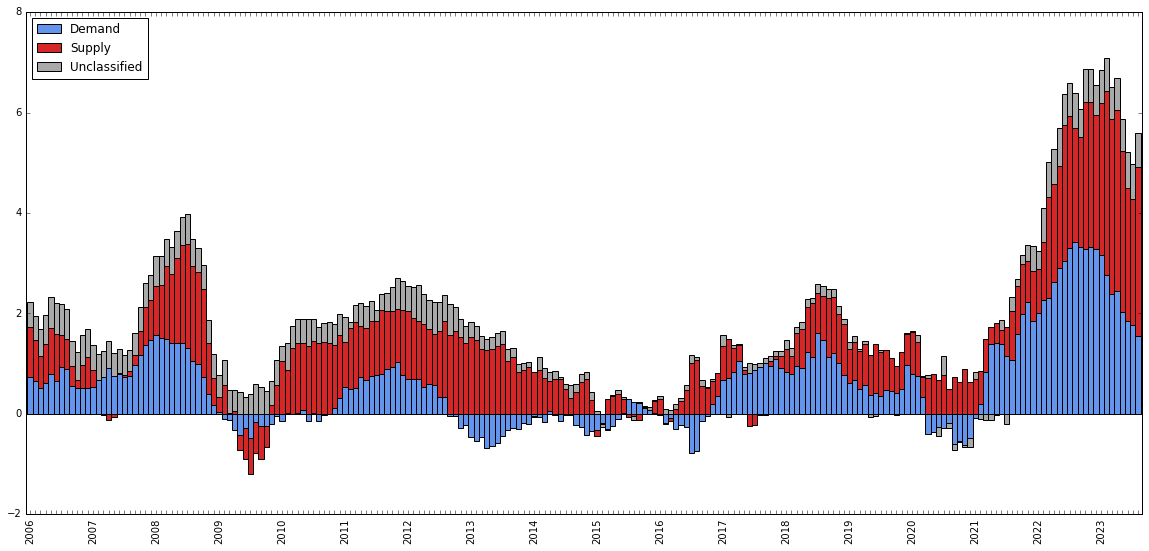

In [24]:
matplotlib.rcParams['figure.figsize'] = [20, 9]
cpi_meta.plot_stack(df=cpi_meta.shapiro_aic,year=2005)

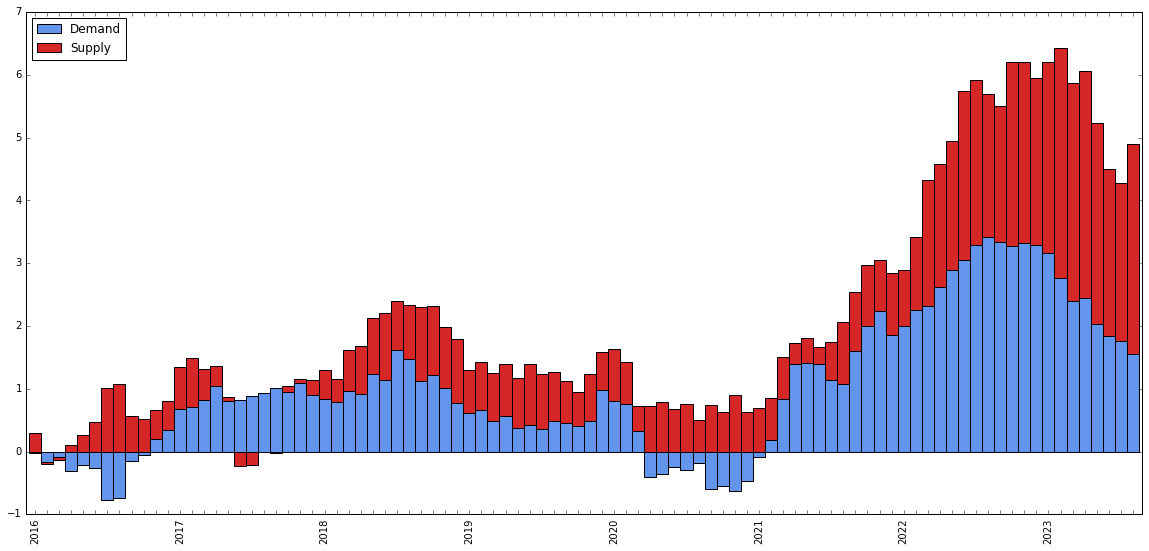

In [23]:
matplotlib.rcParams['figure.figsize'] = [20, 9]
cpi_meta.plot_stack(df=cpi_meta.shapiro_aic,unclassified=False,year=2015)